In [12]:
import sys
sys.path.insert(0,"../")

In [13]:
from utils.createCSV import resnetCSV

In [14]:
resnetCSV("../../data/Training/PALM-Training400","../train_resnet50",None)

In [18]:
import sys
sys.path.insert(0,"../")
from models.resnet50 import MyopiaClasificationModel
from utils.dataloader import ResnetDataset
from utils.transformations import CustomTransformations
from torch.utils.data import DataLoader
import torch
config = {
        "batch_size":4,
        "img_size":512,
        "num_workers":4,
        "num_classes":3,
        "lr":1e-3
    }
model = MyopiaClasificationModel.load_from_checkpoint("./new-model-checkpoint/resnet50H-epoch=5-train_val_acc=0.89.ckpt")

val_dataset = ResnetDataset("../train_resnet50/resnet_val.csv","../../train_resnet50/",transform=CustomTransformations(config["img_size"]))
val_loader = DataLoader(val_dataset,batch_size=config["batch_size"],num_workers=config["num_workers"],shuffle=False)

model.eval()
import numpy as np 
predicted = np.array([])
target = np.array([])
from tqdm import tqdm
with tqdm(total=72) as pbar:
    for x,y in val_loader:
        with torch.no_grad():
            yhat = model(x)
        y_pred = torch.argmax(yhat, dim=1).cpu().numpy() # predicted labels
        y_true = y.cpu().numpy() # true labels
        predicted = np.append(predicted,y_pred)
        target = np.append(target,y_true)
        pbar.update(2)

 56%|█████▌    | 40/72 [00:41<00:33,  1.04s/it]


<AxesSubplot: >

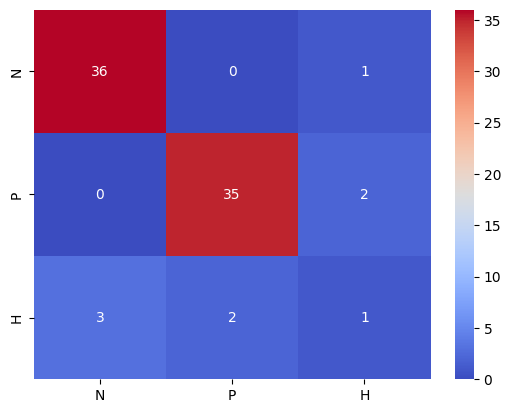

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf = confusion_matrix(target,predicted)

xticklabels=["N","P", "H"]
sns.heatmap(conf,annot=True,cmap="coolwarm",xticklabels=xticklabels,yticklabels=xticklabels)